# Empresa Telecom X: etapa ETL/EDA da análise de dados.

## Quais os 2 principais motivos que mais geraram evasão de cliente?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pergutar, preparar, processar, analisar, compartilhar, agir

#📌 Extracão


In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
cols = ['customer', 'phone', 'internet', 'account']

for col in cols:
    norm = pd.json_normalize(df[col])
    norm.columns = [f'{col}_{c}' for c in norm.columns]  # evita conflito
    df = df.drop(columns=col).join(norm)

#🔧 Transformação

In [4]:
# df_churn = df[df['Churn'] == 'Yes']
df_churn = df.copy()
df_churn.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [6]:
df_churn['customerID'].duplicated().unique()

array([False])

In [9]:
df_churn.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [44]:
df_churn = df_churn.rename(columns={
    'customerID': 'id cliente',
    'Churn': 'churn',
    'customer_gender': 'sexo',
    'customer_SeniorCitizen': 'idoso',
    'customer_Partner': 'possui parceiro',
    'customer_Dependents': 'possui dependentes',
    'customer_tenure': 'tempo contrato',

    'phone_PhoneService': 'servico telefone',
    'phone_MultipleLines': 'multiplas linhas',

    'internet_InternetService': 'servico internet',
    'internet_OnlineBackup': 'backup online',
    'internet_DeviceProtection': 'protecao dispositivo',
    'internet_TechSupport': 'suporte tecnico',
    'internet_StreamingTV': 'streaming tv',
    'internet_StreamingMovies': 'streaming filmes',

    'account_Contract': 'contrato conta',
    'account_PaperlessBilling': 'fatura digital',
    'account_PaymentMethod': 'metodo pagamento',
    'account_Charges.Monthly': 'cobrancas mensais',
    'account_Charges.Total': 'total de encargos',
    'internet_OnlineSecurity': 'seguranca online'
})

In [46]:
df_churn.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,seguranca online,suporte_tecnico,streaming tv,streaming filmes,contrato conta,cobrancas mensais,total de encargos
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,Yes,No,One year,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,Yes,Month-to-month,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,Month-to-month,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,No,Yes,Yes,Month-to-month,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,Yes,Yes,No,Month-to-month,83.9,267.4


In [47]:
df_churn['churn'].value_counts()

,count
churn,
No,5174
Yes,1869
,224


In [50]:
df_churn_ajustado = df_churn.drop(
    columns=[
        'id cliente',
        'protecao dispositivo',
        'fatura digital',
        'backup online',
        'metodo pagamento',
        'seguranca online'
        ],
    errors='ignore'
)

In [51]:
df_churn_ajustado.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte_tecnico,streaming tv,streaming filmes,contrato conta,cobrancas mensais,total de encargos
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,Yes,Yes,No,One year,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,Yes,Month-to-month,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,Month-to-month,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,Month-to-month,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,Yes,Yes,No,Month-to-month,83.9,267.4


In [58]:
colunas_para_converter_str_para_int = ['churn',
    'possui parceiro', 'possui dependentes', 'servico telefone',
    'multiplas linhas', 'suporte_tecnico', 'streaming tv', 'streaming filmes'
]


df_churn_ajustado['churn'] = df_churn_ajustado['churn'].fillna('ausente')


df_churn_ajustado[colunas_para_converter_str_para_int] = (
    df_churn_ajustado[colunas_para_converter_str_para_int].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0, 'ausente': 5, '': 5})
)


df_churn_ajustado[colunas_para_converter_str_para_int] = (
    df_churn_ajustado[colunas_para_converter_str_para_int].astype(np.int64)
)

/tmp/ipython-input-3203086268.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn_ajustado[colunas_para_converter_str_para_int].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0, 'ausente': 5, '': 5})


In [59]:
df_churn_ajustado.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte_tecnico,streaming tv,streaming filmes,contrato conta,cobrancas mensais,total de encargos
0,0,Female,0,1,1,9,1,0,DSL,1,1,0,One year,65.6,593.3
1,0,Male,0,0,0,9,1,1,DSL,0,0,1,Month-to-month,59.9,542.4
2,1,Male,0,0,0,4,1,0,Fiber optic,0,0,0,Month-to-month,73.9,280.85
3,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,Month-to-month,98.0,1237.85
4,1,Female,1,1,0,3,1,0,Fiber optic,1,1,0,Month-to-month,83.9,267.4


In [60]:
df_churn_ajustado['sexo'] = df_churn_ajustado['sexo'].replace({
    'Male': 'Masculino',
    'Female': 'Feminino'
})

df_churn_ajustado['servico internet'] = df_churn_ajustado['servico internet'].replace({
    'Fiber optic': 'Fibra optica',
    'No': 'Nao disponivel'
})

df_churn_ajustado['contrato conta'] = df_churn_ajustado['contrato conta'].replace({
    'Month-to-month': 'Mensal',
    'One year': 'Um ano',
    'Two year': 'Dois anos'
})


In [61]:
df_churn_ajustado.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte_tecnico,streaming tv,streaming filmes,contrato conta,cobrancas mensais,total de encargos
0,0,Feminino,0,1,1,9,1,0,DSL,1,1,0,Um ano,65.6,593.3
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,1,Mensal,59.9,542.4
2,1,Masculino,0,0,0,4,1,0,Fibra optica,0,0,0,Mensal,73.9,280.85
3,1,Masculino,1,1,0,13,1,0,Fibra optica,0,1,1,Mensal,98.0,1237.85
4,1,Feminino,1,1,0,3,1,0,Fibra optica,1,1,0,Mensal,83.9,267.4


In [62]:
dados_churn_traduzido = df_churn_ajustado.copy()

In [64]:
dados_churn_traduzido.to_csv('dados_churn_traduzido.csv', index=False)

In [65]:
df_churn_traduzido = pd.read_csv('/content/dados_churn_traduzido.csv')

In [68]:
dados_churn_traduzido['churn'].unique()

array([0, 1, 5])

In [73]:
dados_churn_traduzido['total de encargos'] = (
    pd.to_numeric(dados_churn_traduzido['total de encargos'], errors='coerce')
)

In [76]:
dados_churn_traduzido['total de encargos'] = dados_churn_traduzido['total de encargos'].astype(np.float64)

In [81]:
dados_churn_traduzido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   churn               7267 non-null   int64  
 1   sexo                7267 non-null   object 
 2   idoso               7267 non-null   int64  
 3   possui parceiro     7267 non-null   int64  
 4   possui dependentes  7267 non-null   int64  
 5   tempo contrato      7267 non-null   int64  
 6   servico telefone    7267 non-null   int64  
 7   multiplas linhas    7267 non-null   int64  
 8   servico internet    7267 non-null   object 
 9   suporte_tecnico     7267 non-null   int64  
 10  streaming tv        7267 non-null   int64  
 11  streaming filmes    7267 non-null   int64  
 12  contrato conta      7267 non-null   object 
 13  cobrancas mensais   7267 non-null   float64
 14  total de encargos   7256 non-null   float64
dtypes: float64(2), int64(10), object(3)
memory usage: 851.7

In [86]:
dados_churn_traduzido['excedente a mensalidade'] = dados_churn_traduzido[
    'total de encargos'] - dados_churn_traduzido['cobrancas mensais']

In [87]:
cobrancas_diarias = dados_churn_traduzido['cobrancas mensais'] / 30
dados_churn_traduzido.insert(13, 'preco diario', cobrancas_diarias)

In [88]:
dados_churn_traduzido.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte_tecnico,streaming tv,streaming filmes,contrato conta,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade
0,0,Feminino,0,1,1,9,1,0,DSL,1,1,0,Um ano,2.186667,65.6,593.30,527.70
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,1,Mensal,1.996667,59.9,542.40,482.50
2,1,Masculino,0,0,0,4,1,0,Fibra optica,0,0,0,Mensal,2.463333,73.9,280.85,206.95
3,1,Masculino,1,1,0,13,1,0,Fibra optica,0,1,1,Mensal,3.266667,98.0,1237.85,1139.85
4,1,Feminino,1,1,0,3,1,0,Fibra optica,1,1,0,Mensal,2.796667,83.9,267.40,183.50


In [89]:
dados_churn_traduzido['churn'].unique()

array([0, 1, 5])

In [91]:
indices_churn_ausentes = dados_churn_traduzido[
    dados_churn_traduzido['churn'] == 5
].index


In [ ]:
dados_churn_traduzido = dados_churn_traduzido.drop(indices_churn_ausentes)

In [93]:
dados_churn_traduzido

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte_tecnico,streaming tv,streaming filmes,contrato conta,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade
0,0,Feminino,0,1,1,9,1,0,DSL,1,1,0,Um ano,2.186667,65.60,593.30,527.70
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,1,Mensal,1.996667,59.90,542.40,482.50
2,1,Masculino,0,0,0,4,1,0,Fibra optica,0,0,0,Mensal,2.463333,73.90,280.85,206.95
3,1,Masculino,1,1,0,13,1,0,Fibra optica,0,1,1,Mensal,3.266667,98.00,1237.85,1139.85
4,1,Feminino,1,1,0,3,1,0,Fibra optica,1,1,0,Mensal,2.796667,83.90,267.40,183.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Feminino,0,0,0,13,1,0,DSL,1,0,0,Um ano,1.838333,55.15,742.90,687.75
7263,1,Masculino,0,1,0,22,1,1,Fibra optica,0,0,1,Mensal,2.836667,85.10,1873.70,1788.60
7264,0,Masculino,0,0,0,2,1,0,DSL,0,0,0,Mensal,1.676667,50.30,92.75,42.45
7265,0,Masculino,0,1,1,67,1,0,DSL,1,0,1,Dois anos,2.261667,67.85,4627.65,4559.80


In [95]:
dados_churn_traduzido.replace(r'^\s*$', np.nan, regex=True, inplace=True)


In [97]:
dados_churn_traduzido.isna().sum()


,0
churn,0
sexo,0
idoso,0
possui parceiro,0
possui dependentes,0
tempo contrato,0
servico telefone,0
multiplas linhas,0
servico internet,0
suporte_tecnico,0


In [99]:
dados_churn_traduzido['total de encargos'] = dados_churn_traduzido['total de encargos'].interpolate(method='linear')

In [100]:
dados_churn_traduzido.isna().sum()

,0
churn,0
sexo,0
idoso,0
possui parceiro,0
possui dependentes,0
tempo contrato,0
servico telefone,0
multiplas linhas,0
servico internet,0
suporte_tecnico,0


In [102]:
dados_churn_traduzido = dados_churn_traduzido.drop(columns=['excedente a mensalidade'])

dados_churn_traduzido['excedente a mensalidade'] = dados_churn_traduzido['total de encargos'] - dados_churn_traduzido['cobrancas mensais']

In [103]:
dados_churn_traduzido.isna().sum()

,0
churn,0
sexo,0
idoso,0
possui parceiro,0
possui dependentes,0
tempo contrato,0
servico telefone,0
multiplas linhas,0
servico internet,0
suporte_tecnico,0


In [94]:
df_churn_traduzido['sexo'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [84]:
dados_churn_traduzido['total de encargos'].max()

8684.8

In [105]:
colunas_float = ['preco diario', 'cobrancas mensais', 'total de encargos', 'excedente a mensalidade']

dados_churn_traduzido[colunas_float] = dados_churn_traduzido[colunas_float].round(1)

In [106]:
dados_churn_traduzido.head()

,churn,sexo,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,servico internet,suporte_tecnico,streaming tv,streaming filmes,contrato conta,preco diario,cobrancas mensais,total de encargos,excedente a mensalidade
0,0,Feminino,0,1,1,9,1,0,DSL,1,1,0,Um ano,2.2,65.6,593.3,527.7
1,0,Masculino,0,0,0,9,1,1,DSL,0,0,1,Mensal,2.0,59.9,542.4,482.5
2,1,Masculino,0,0,0,4,1,0,Fibra optica,0,0,0,Mensal,2.5,73.9,280.8,207.0
3,1,Masculino,1,1,0,13,1,0,Fibra optica,0,1,1,Mensal,3.3,98.0,1237.8,1139.8
4,1,Feminino,1,1,0,3,1,0,Fibra optica,1,1,0,Mensal,2.8,83.9,267.4,183.5


In [113]:
indices_churn_ausentes = dados_churn_traduzido[
    dados_churn_traduzido['churn'] == 5
].index

dados_churn_traduzido = dados_churn_traduzido.drop(indices_churn_ausentes)


In [125]:
print(dados_churn_traduzido['churn'].dtype)
print(dados_churn_traduzido['churn'].unique())



int64
[0 1]


In [133]:
dados_churn_traduzido = dados_churn_traduzido.reset_index(drop=True)

#📊 Carga e análise

In [134]:
dados_churn_analise = dados_churn_traduzido

In [135]:
dados_churn_analise['churn'].sum()

np.int64(1869)

In [138]:
dados_churn_analise['churn'].value_counts()

,count
churn,
0,5174
1,1869


In [146]:
dados_churn_analise.describe().round(2)

,churn,idoso,possui parceiro,possui dependentes,tempo contrato,servico telefone,multiplas linhas,suporte_tecnico,streaming tv,streaming filmes,cobrancas mensais
count,7267.00,7267.00,7267.00,7267.00,7267.00,7267.0,7267.00,7267.00,7267.00,7267.00,7267.00
mean,0.41,0.16,0.48,0.30,32.35,0.9,0.42,0.29,0.38,0.39,64.72
std,0.93,0.37,0.50,0.46,24.57,0.3,0.49,0.45,0.49,0.49,30.13
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,18.25
25%,0.00,0.00,0.00,0.00,9.00,1.0,0.00,0.00,0.00,0.00,35.42
50%,0.00,0.00,0.00,0.00,29.00,1.0,0.00,0.00,0.00,0.00,70.30
75%,1.00,0.00,1.00,1.00,55.00,1.0,1.00,1.00,1.00,1.00,89.88
max,5.00,1.00,1.00,1.00,72.00,1.0,1.00,1.00,1.00,1.00,118.75


/tmp/ipython-input-2754500486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


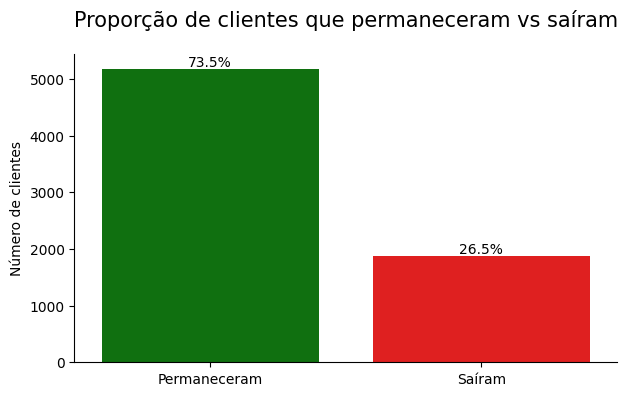

In [157]:
dados_churn_analise = df_churn_traduzido.copy()

dados_churn_analise['churn_label'] = dados_churn_analise['churn'].map({0: 'Permaneceram', 1: 'Saíram'})

cores = {'Permaneceram':'green', 'Saíram':'red'}

plt.figure(figsize=(7,4))

ax = sns.countplot(
    x='churn_label',
    data=dados_churn_analise,
    palette=cores,
    order=['Permaneceram','Saíram']
)

# Calcular total como soma das alturas das barras para porcentagem correta
total = sum([p.get_height() for p in ax.patches])

# Adicionar porcentagens acima das barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 50,
            f'{height/total*100:.1f}%',
            ha='center')

sns.despine()

plt.title('Proporção de clientes que permaneceram vs saíram', fontsize=15, pad=20)
plt.xlabel('')
plt.ylabel('Número de clientes')

# Ajustar limite do eixo Y


plt.show()


#📄Relatorio Final
